In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('metal_binding_data.csv')

In [3]:
print(df.head(1)['SEQUENCE'])

0    MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...
Name: SEQUENCE, dtype: object


In [4]:
df2=df.dropna(axis=0)

In [5]:
final_df=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]

final_df=final_df.reset_index(drop=True)
#final_sequence = list(final_sequence)
final_df = final_df.drop([2,9224,10830,13275,13276,13277,15331,15332,15333,15334])

In [6]:
final_df

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"120,122,124,189,208,250","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
3,11,P51399,MPSYTVTVATGSQWFAGTDDYIYLSLIGSAGCSEKHLLDKAFYNDF...,"17,18,19,44,45,47,79,80","Calcium 1,Calcium 2,Calcium 2,Calcium 2,Calciu..."
4,17,P00433,MHFSSSSTLFTCITLIPLVCLILHASLSDAQLTPTFYDNSCPNVSN...,"73,76,78,80,82,94,201,252,255,260","Calcium 1,Calcium 1,Calcium 1,Calcium 1,Calciu..."
5,19,P22195,MALPISKVDFLIFMCLIGLGSAQLSSNFYATKCPNALSTIKSAVNS...,"65,68,70,72,74,192,236,239,242,244","Calcium 1,Calcium 1,Calcium 1,Calcium 1,Calciu..."
...,...,...,...,...,...
18526,101350,Q3SFS6,MHTGTTLTQFIIEEQRRTAGATGDFTSLLNDVVTACKAISNAVNKG...,"92,114,114,116,117,281","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."
18527,101351,Q82WY3,MHTGTTLTQFIIEEQRHIAGASGDFTALLNDIVTAIKTISNAVNKG...,"92,114,114,116,117,281","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."
18528,101352,A5WGK6,MTSLTQYFEQHPKLPQTQAVIDVITTITNVGKQITDLLRQGALADI...,"87,106,106,108,109,280","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."
18529,101353,A5WA74,MSRVTLSRYLIEQTRSNNTPADLRFLIEVVARACKEISHHVSKGAL...,"90,112,112,114,115,283","Magnesium 1,Magnesium 1,Magnesium 2,Magnesium ..."


In [7]:
# embedded_sequence1=np.load('ESM5000_emb.npy')
# embedded_sequence2=np.load('ESM10000_emb.npy')
# embedded_sequence3=np.load('ESM15000_emb.npy')
# embedded_sequence4=np.load('ESM18531_emb.npy')
# embedded_sequence11=np.vstack((embedded_sequence1, embedded_sequence2))
# embedded_sequence12=np.vstack((embedded_sequence11, embedded_sequence3))
# embedded_sequence=np.vstack((embedded_sequence12, embedded_sequence4))


import pickle

file_path = '/home/f087s426/Research/MetaLLM_ACM_Rebuttal/metallm_esmfold_embedding.pkl'

with open(file_path, 'rb') as file:
    embedded_sequence = pickle.load(file)

In [8]:
np.array(embedded_sequence).shape

(18521, 1024)

In [9]:
#np.save('/home/f087s426/Research/Lmetalsite paper data/allsequence_metallm_esm_embedding.npy',embedded_sequence)

In [10]:
embed_df=pd.DataFrame(embedded_sequence)

In [11]:
embed_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.041939,-0.010873,-0.467963,0.310137,0.127784,0.704308,-0.559965,-0.156952,0.035446,0.456611,...,0.245048,-0.116767,-0.281918,-0.652239,0.205710,-0.276020,0.083462,-0.348077,-0.318381,-0.295192
1,-0.074355,-0.008929,-0.219798,0.548812,0.190803,0.821614,-0.757151,0.317074,0.156304,0.231713,...,0.484166,-0.233435,0.053074,-0.735769,0.232502,-0.287993,0.340945,-0.406402,-0.408281,-0.062523
2,-0.182016,0.011866,-0.160613,0.501403,0.178825,0.690172,-0.503040,0.171296,0.199633,0.304349,...,0.447534,-0.136265,-0.024796,-0.714874,0.272471,-0.208288,0.237141,-0.388275,-0.372011,-0.175848
3,-0.259294,-0.039980,-0.308379,0.173407,0.095943,0.815611,-0.576996,0.078456,-0.195317,0.700715,...,0.494836,-0.288961,-0.428585,-0.910286,0.530201,-0.195192,0.110988,-0.412287,-0.407850,-0.213495
4,-0.174013,-0.161765,-0.444446,0.291452,-0.050634,0.803665,-0.670811,0.144965,-0.167948,0.507631,...,0.201597,-0.290756,-0.401581,-1.042332,0.430704,-0.325640,0.103646,-0.406319,-0.277889,-0.407641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,0.092713,0.002509,-0.439124,0.527161,0.018096,0.810013,-0.731164,-0.007131,0.267845,0.355379,...,0.234209,-0.233255,-0.093552,-0.776543,0.226336,-0.203114,0.267859,-0.364667,-0.310696,-0.183796
18517,0.076877,-0.010324,-0.378317,0.468683,-0.026245,0.753147,-0.631214,-0.065762,0.138076,0.467439,...,0.339193,-0.222199,-0.186551,-0.738642,0.278618,-0.117078,0.232478,-0.361912,-0.377795,-0.309233
18518,-0.045750,0.043162,-0.296516,0.382958,0.113231,0.804094,-0.775273,0.084011,0.013301,0.318587,...,0.453033,-0.117575,-0.221546,-0.806370,0.253362,-0.311568,0.165825,-0.505554,-0.417533,-0.239234
18519,0.132212,0.061855,-0.331201,0.466679,-0.093537,0.797494,-0.774579,0.052255,0.112065,0.303644,...,0.482815,-0.243881,-0.109157,-0.784950,0.114086,-0.100309,0.268775,-0.415637,-0.399098,-0.326418


In [12]:
def data_preparation(embedded_sequence,site,metalss):
  X=[]
  binding_sites=[]
  Y=[]

  embeds=list(embedded_sequence)
  sites=list(site)
  metal=list(metalss)

  for i in range(len(sites)):

    embed=embeds[i]

    sitess=[int(j) for j in sites[i].split(',')]

    metals=[j.strip() for j in metal[i].split(',')]

    X=X+[embed]*len(sitess)
    binding_sites=binding_sites+sitess
    Y=Y+metals

  return pd.DataFrame({'embedding':X, 'site':binding_sites,'metal':Y})

In [13]:
embedding_df=data_preparation(embedded_sequence,final_df['SITES'],final_df['METAL'])
embedding_df.head(10)

,embedding,site,metal
0,"[0.041939374, -0.0108725, -0.4679634, 0.310136...",120,Zinc 1
1,"[0.041939374, -0.0108725, -0.4679634, 0.310136...",122,Zinc 1
2,"[0.041939374, -0.0108725, -0.4679634, 0.310136...",124,Zinc 2
3,"[0.041939374, -0.0108725, -0.4679634, 0.310136...",189,Zinc 1
4,"[0.041939374, -0.0108725, -0.4679634, 0.310136...",208,Zinc 2
5,"[0.041939374, -0.0108725, -0.4679634, 0.310136...",250,Zinc 2
6,"[-0.0743553, -0.008928944, -0.21979809, 0.5488...",89,Calcium 3
7,"[-0.0743553, -0.008928944, -0.21979809, 0.5488...",91,Calcium 3
8,"[-0.0743553, -0.008928944, -0.21979809, 0.5488...",96,Calcium 3
9,"[-0.0743553, -0.008928944, -0.21979809, 0.5488...",175,Calcium 3


In [14]:
type(embedding_df['metal'][0])

str

In [15]:
#regex module
import re
metal_list=[]
#original string
#string1 = "Hello!James12,India2020"
for i in embedding_df['metal']:
    
    pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
    new_string=re.sub(pattern, '',i)
    metal_list.append(new_string)
#print(new_string)

In [16]:
embedding_df['metal']

0              Zinc 1
1              Zinc 1
2              Zinc 2
3              Zinc 1
4              Zinc 2
             ...     
126501    Magnesium 1
126502    Magnesium 2
126503    Magnesium 1
126504    Magnesium 2
126505    Magnesium 2
Name: metal, Length: 126506, dtype: object

In [17]:
len(set(metal_list))

11

In [18]:
embedding_df.shape

(126506, 3)

In [19]:
def position_embeddings(max_binding_position, d=1024, n=10000):
    P = np.zeros((max_binding_position, d))

    for k in range(max_binding_position):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [20]:
max(embedding_df.site)

986

In [21]:
max_binding_site=max(embedding_df.site)+1
pos_encodings=position_embeddings(max_binding_site)

In [22]:
pos_encodings.shape

(987, 1024)

In [23]:
embedding_df['metal_list']=metal_list
X_X=list(embedding_df.embedding)
Y=list(embedding_df.metal_list)
labels=list(set(metal_list))

In [24]:
n_labels=len(labels)
n_labels

11

In [25]:
embedding_df.shape

(126506, 4)

In [26]:
labels

['Magnesium ',
 'Copper ',
 'Manganese ',
 'Cadmium ',
 'Calcium ',
 'Nickel ',
 'Sodium ',
 'Zinc ',
 'Iron ',
 'Potassium ',
 'Cobalt ']

In [27]:
X_X=list(embedding_df.embedding)
X_site=list(embedding_df.site)
X_site=list(map(lambda x: pos_encodings[x, :], X_site))
X_and_site=[x+s for x,s in zip(X_X, X_site)]
len(X_and_site)

126506

In [28]:
len(X_and_site[0])

1024

In [29]:
X=X_and_site

In [30]:

len(X)
     

126506

In [31]:
X=np.array(X)

In [32]:
Y=np.array(Y)

In [33]:
X.shape[1]

1024

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
encoded_metal=vectorizer.fit_transform(Y)
print(vectorizer.get_feature_names_out())

['cadmium' 'calcium' 'cobalt' 'copper' 'iron' 'magnesium' 'manganese'
 'nickel' 'potassium' 'sodium' 'zinc']


In [35]:
encoded_metal[0].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [36]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=120, stratify=Y)

In [37]:
encoded_metal.toarray().shape

(126506, 11)

In [38]:
X.shape

(126506, 1024)

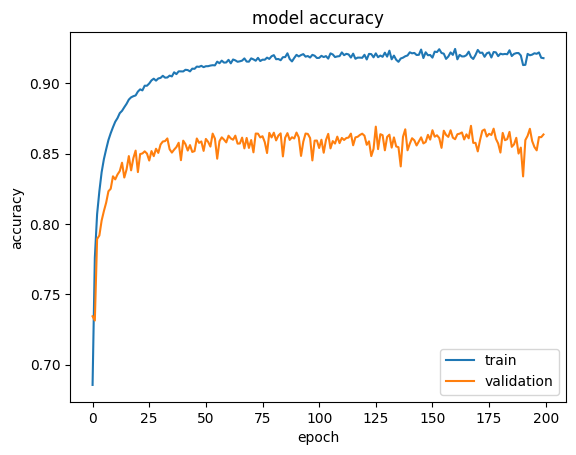

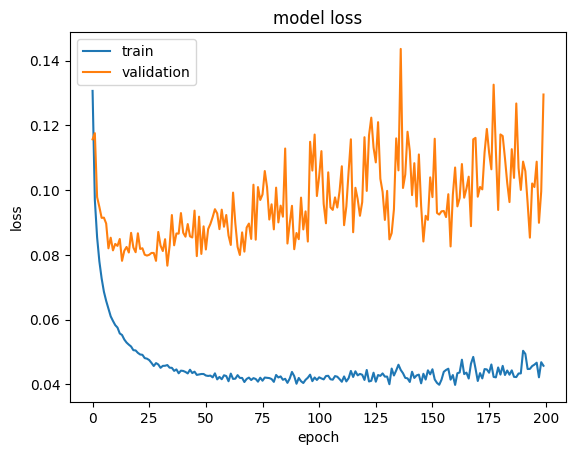

MCC-Score 0.7101536108930753
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.96      0.69      0.80      3002
           2       0.00      0.00      0.00        14
           3       0.79      0.88      0.83       125
           4       0.91      0.85      0.88       547
           5       0.72      0.83      0.77      2197
           6       0.75      0.22      0.34      2123
           7       1.00      0.78      0.88       322
           8       0.00      0.00      0.00         0
           9       0.94      0.85      0.89        39
          10       0.84      0.93      0.88      4282

   micro avg       0.84      0.73      0.78     12651
   macro avg       0.63      0.55      0.57     12651
weighted avg       0.84      0.73      0.75     12651
 samples avg       0.73      0.73      0.73     12651



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

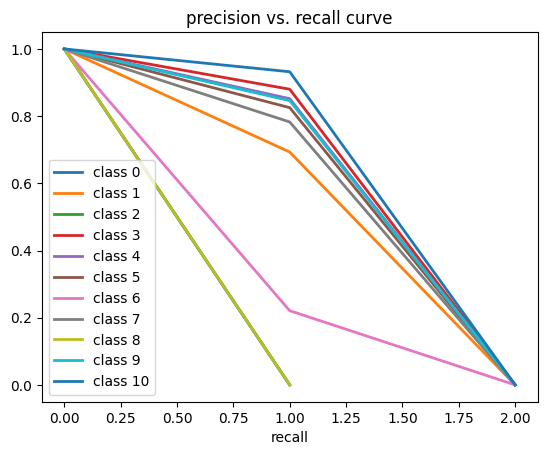

Accuracy is: >0.728


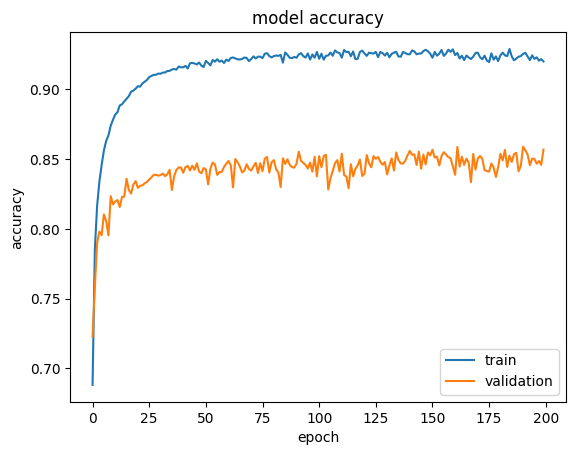

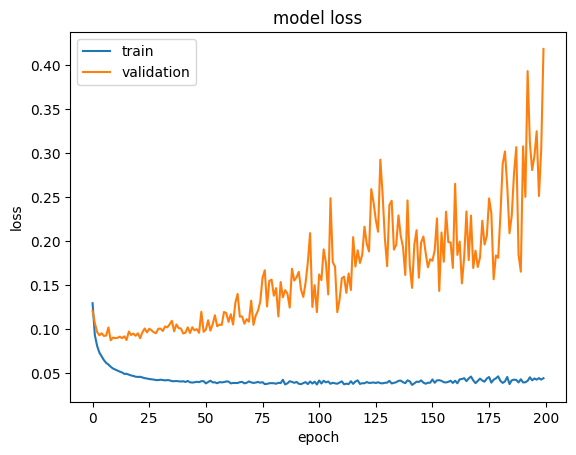

MCC-Score 0.8478150595313138
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.91      0.78      0.84      1674
           2       0.00      0.00      0.00        12
           3       0.99      0.80      0.88       397
           4       0.98      0.94      0.96      2584
           5       0.85      0.86      0.86      2480
           6       0.95      0.70      0.81      1784
           7       0.33      0.08      0.13        12
           8       0.96      0.71      0.81        31
           9       1.00      0.67      0.80         9
          10       0.87      0.89      0.88      3668

   micro avg       0.91      0.85      0.88     12651
   macro avg       0.71      0.58      0.63     12651
weighted avg       0.91      0.85      0.87     12651
 samples avg       0.84      0.85      0.85     12651



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

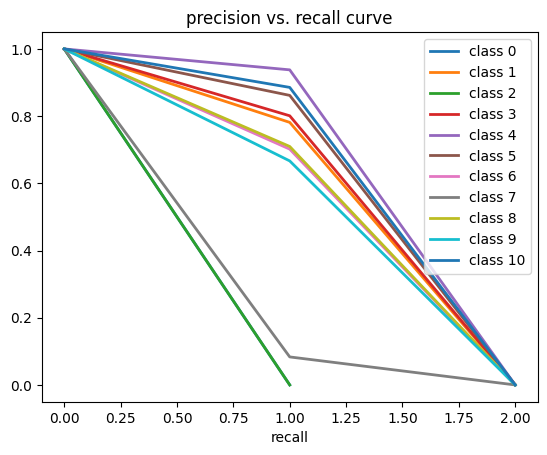

Accuracy is: >0.842


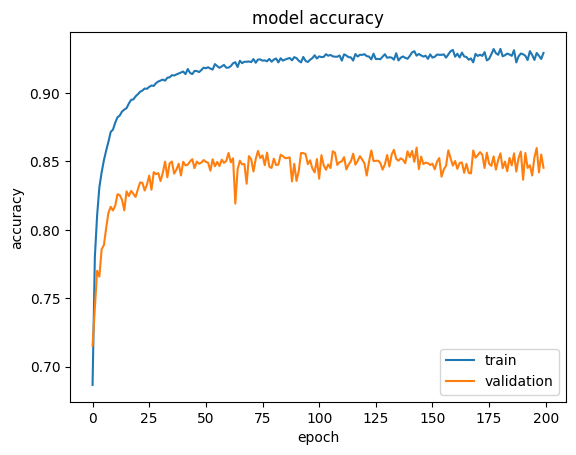

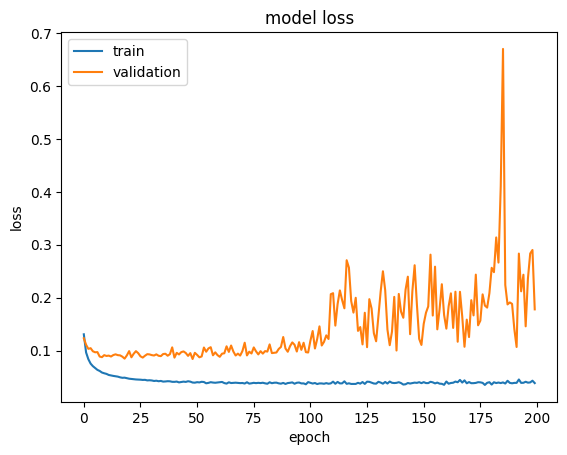

MCC-Score 0.8630577686546319
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.97      0.78      0.87      2700
           2       0.00      0.00      0.00         0
           3       0.99      0.89      0.94       196
           4       0.94      0.95      0.95      1471
           5       0.92      0.80      0.86      2451
           6       0.93      0.84      0.88      1491
           7       0.33      0.50      0.40         6
           8       1.00      0.59      0.75        32
           9       0.56      0.45      0.50        11
          10       0.92      0.93      0.92      4285

   micro avg       0.93      0.86      0.90     12651
   macro avg       0.69      0.61      0.64     12651
weighted avg       0.94      0.86      0.89     12651
 samples avg       0.86      0.86      0.86     12651



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

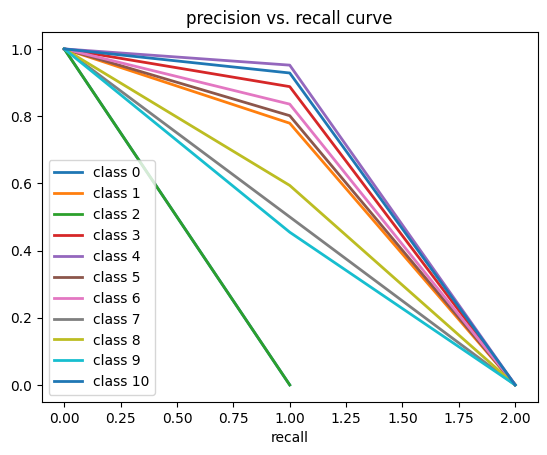

Accuracy is: >0.860


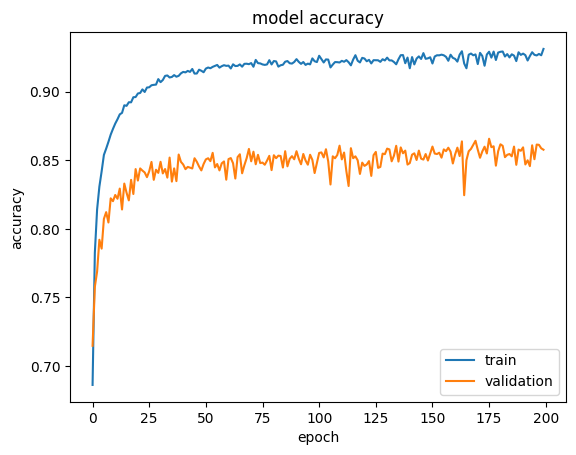

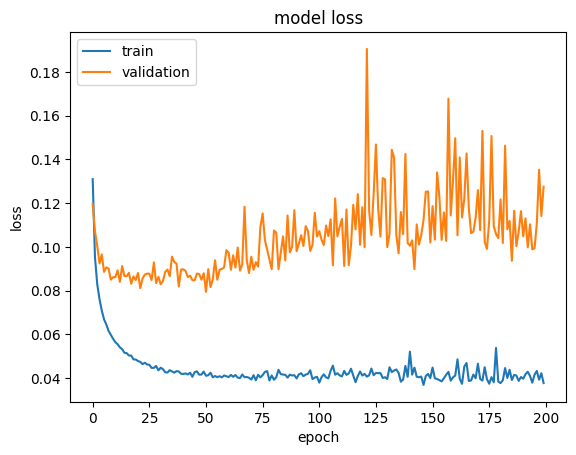

MCC-Score 0.8601998555031034
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.81      0.86      2259
           2       0.00      0.00      0.00         0
           3       0.98      0.84      0.91       272
           4       1.00      0.90      0.94      2008
           5       0.93      0.81      0.87      2568
           6       0.91      0.84      0.87      1657
           7       0.00      0.00      0.00        20
           8       0.96      1.00      0.98        22
           9       0.00      0.00      0.00         0
          10       0.91      0.89      0.90      3845

   micro avg       0.93      0.85      0.89     12651
   macro avg       0.60      0.55      0.57     12651
weighted avg       0.93      0.85      0.89     12651
 samples avg       0.85      0.85      0.85     12651



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

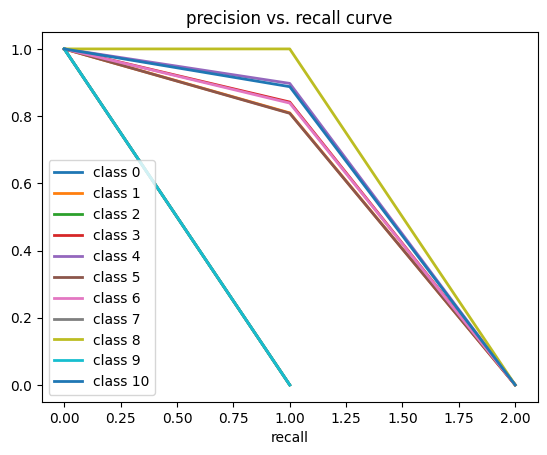

Accuracy is: >0.850


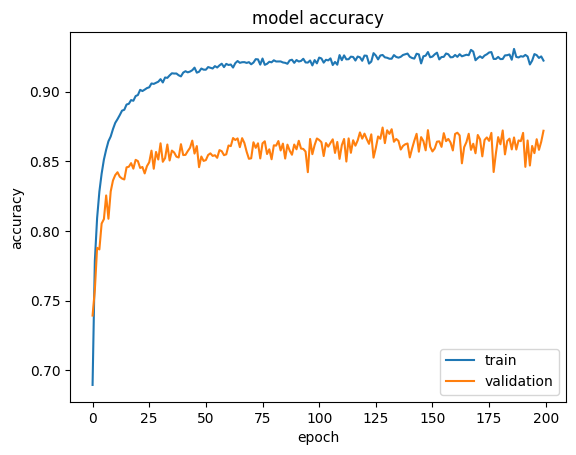

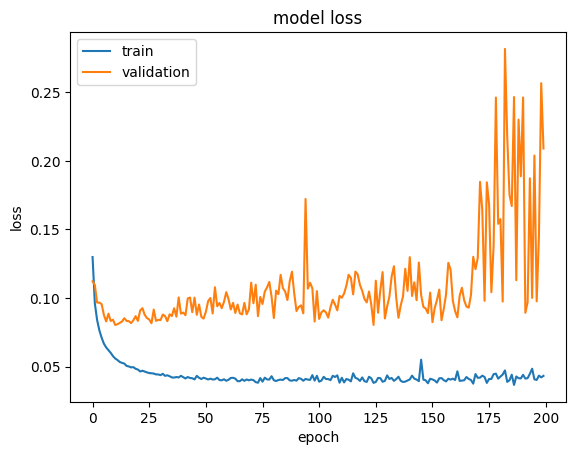

MCC-Score 0.8648214382679411
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.92      0.89      0.91      1900
           2       0.00      0.00      0.00         0
           3       1.00      0.80      0.89       268
           4       0.94      0.94      0.94       960
           5       0.89      0.84      0.87      2404
           6       0.97      0.74      0.84      2150
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00        36
          10       0.92      0.93      0.93      4933

   micro avg       0.93      0.87      0.90     12651
   macro avg       0.60      0.56      0.58     12651
weighted avg       0.93      0.87      0.90     12651
 samples avg       0.87      0.87      0.87     12651



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

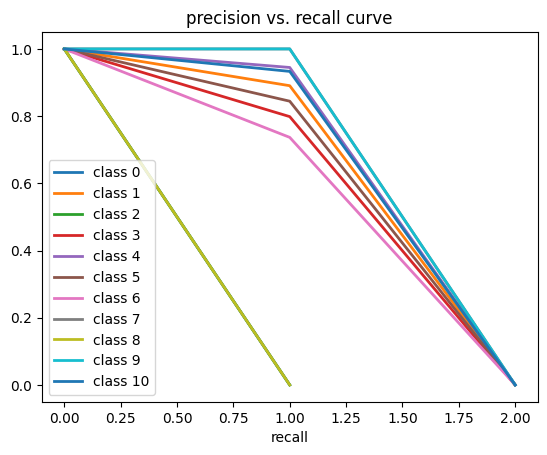

Accuracy is: >0.874


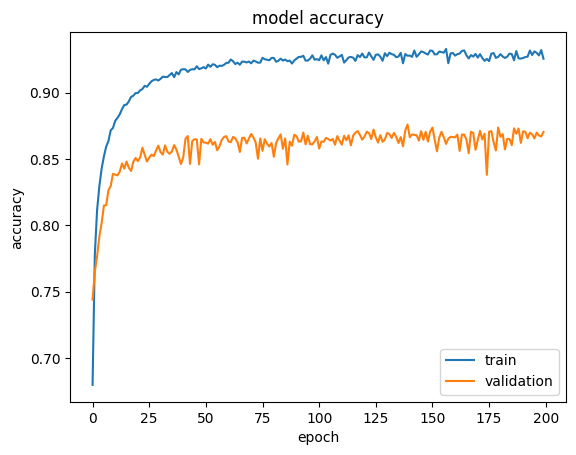

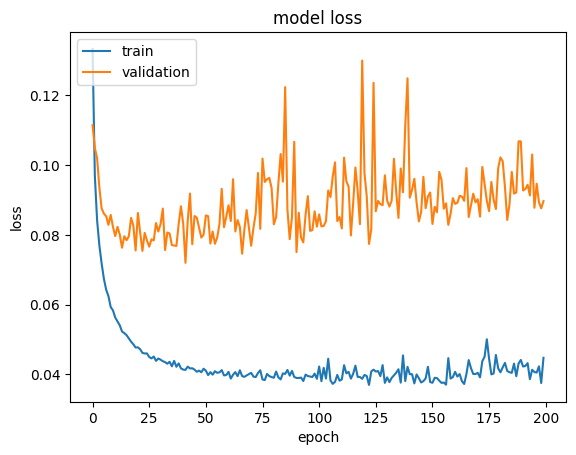

MCC-Score 0.8570779470689804
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.84      0.88      1607
           2       0.00      0.00      0.00         0
           3       0.75      0.87      0.80        82
           4       0.99      0.83      0.90      1008
           5       0.92      0.86      0.89      3590
           6       0.71      0.74      0.73      1199
           7       1.00      0.97      0.98       783
           8       0.00      0.00      0.00         0
           9       1.00      0.97      0.98        90
          10       0.95      0.92      0.93      4292

   micro avg       0.92      0.87      0.89     12651
   macro avg       0.66      0.63      0.65     12651
weighted avg       0.92      0.87      0.89     12651
 samples avg       0.87      0.87      0.87     12651



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

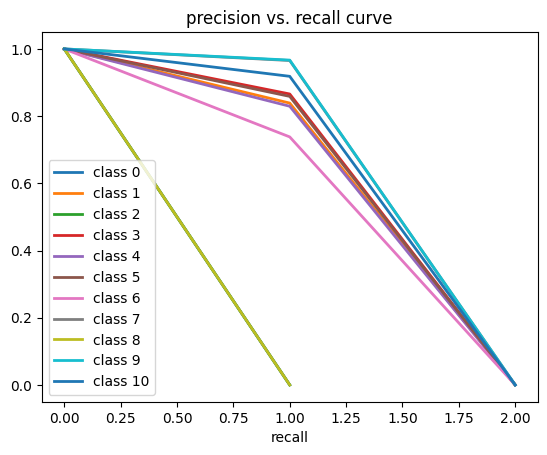

Accuracy is: >0.870


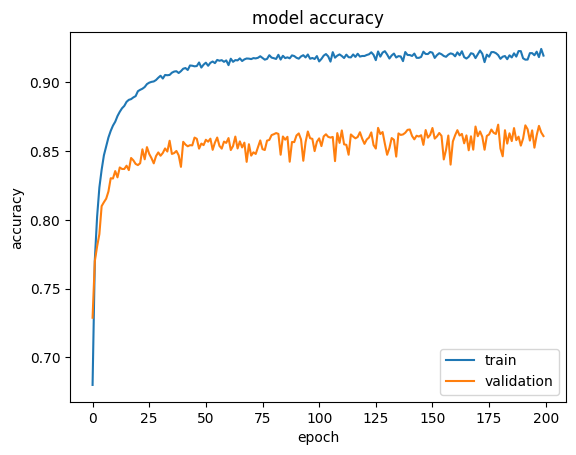

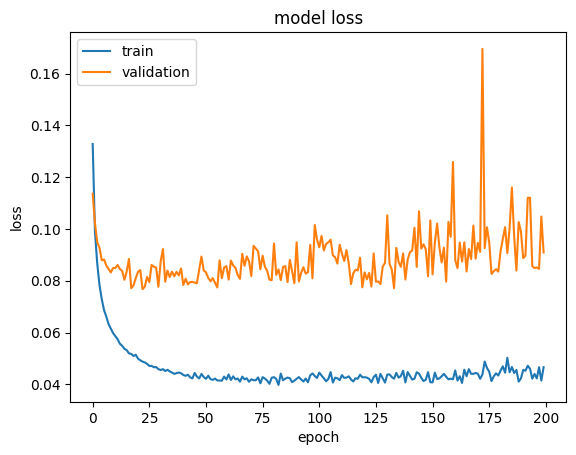

MCC-Score 0.8807847675210241
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.96      0.91      0.93      1859
           2       0.00      0.00      0.00        24
           3       0.90      0.96      0.92        45
           4       0.83      0.78      0.80       216
           5       0.94      0.94      0.94      4120
           6       0.83      0.56      0.67       926
           7       1.00      0.99      0.99       488
           8       0.00      0.00      0.00         0
           9       1.00      0.97      0.99        35
          10       0.96      0.92      0.94      4937

   micro avg       0.94      0.89      0.92     12650
   macro avg       0.67      0.64      0.65     12650
weighted avg       0.94      0.89      0.91     12650
 samples avg       0.89      0.89      0.89     12650



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

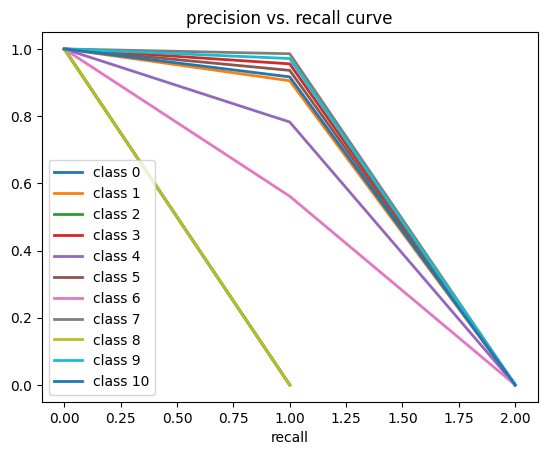

Accuracy is: >0.891


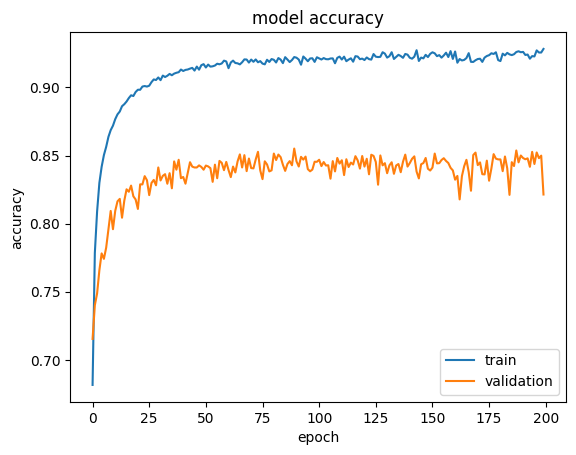

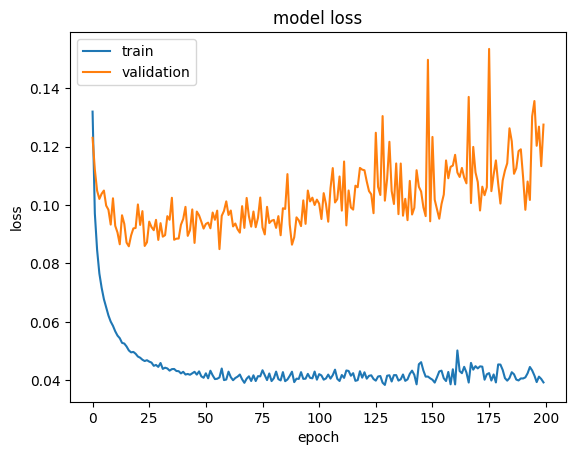

MCC-Score 0.822914656548441
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.77      0.85      2425
           2       0.00      0.00      0.00         7
           3       0.89      0.80      0.84       191
           4       0.93      0.72      0.81       565
           5       0.76      0.88      0.82      2142
           6       0.93      0.68      0.79      1531
           7       0.99      0.98      0.99       330
           8       1.00      0.70      0.82       217
           9       0.83      0.50      0.62        10
          10       0.95      0.89      0.92      5232

   micro avg       0.91      0.83      0.87     12650
   macro avg       0.75      0.63      0.68     12650
weighted avg       0.91      0.83      0.87     12650
 samples avg       0.83      0.83      0.83     12650



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

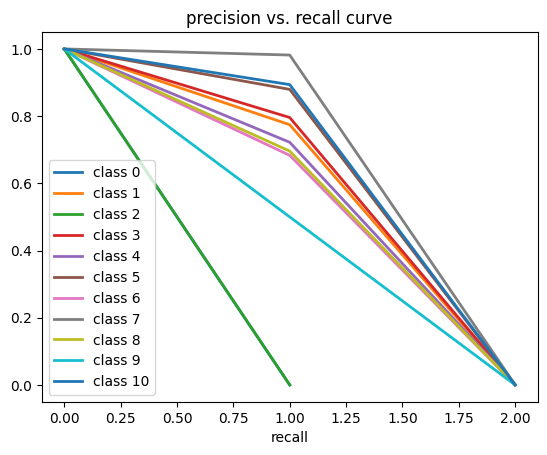

Accuracy is: >0.829


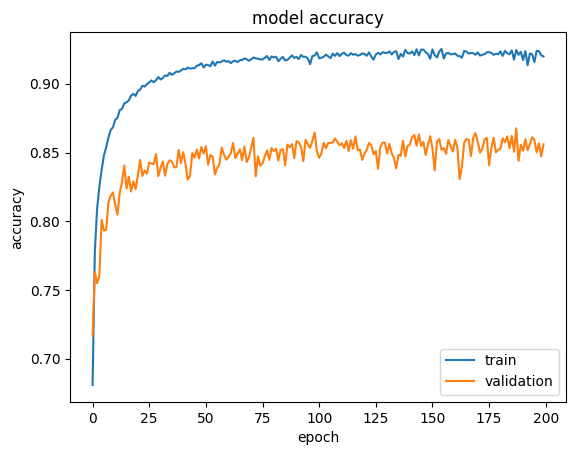

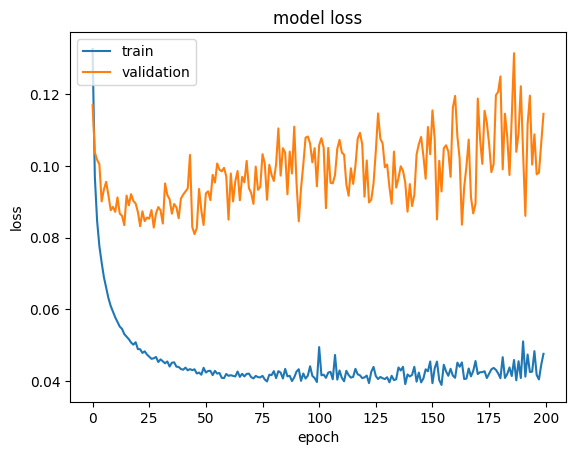

MCC-Score 0.7811110996195311
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.60      0.73      2290
           2       0.00      0.00      0.00         0
           3       0.98      0.80      0.88       276
           4       0.95      0.77      0.85      1731
           5       0.86      0.87      0.86      3074
           6       0.84      0.82      0.83      1478
           7       0.94      0.62      0.75        24
           8       1.00      0.35      0.52       341
           9       1.00      0.08      0.15       114
          10       0.89      0.90      0.90      3322

   micro avg       0.89      0.79      0.84     12650
   macro avg       0.76      0.53      0.59     12650
weighted avg       0.90      0.79      0.83     12650
 samples avg       0.79      0.79      0.79     12650



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

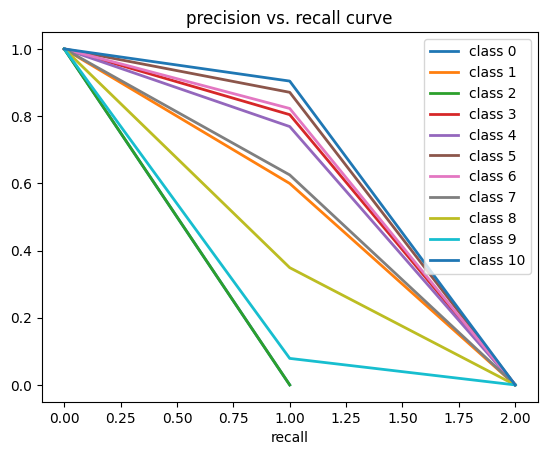

Accuracy is: >0.788


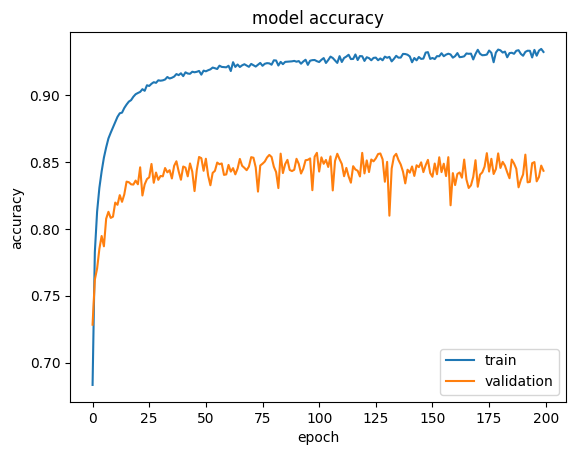

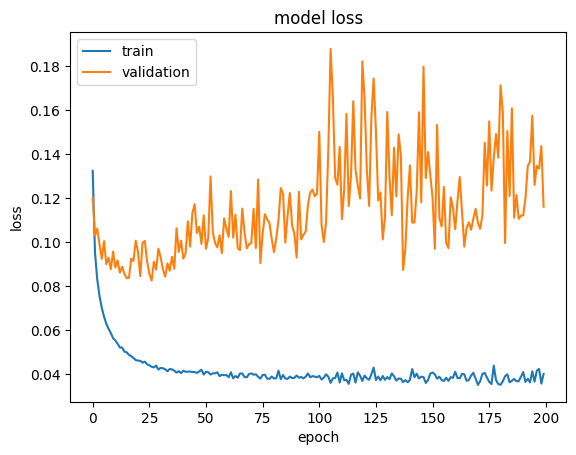

MCC-Score 0.8043500694190928
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.74      0.83      1910
           2       0.00      0.00      0.00        12
           3       0.72      0.79      0.75       102
           4       0.94      0.87      0.91      2141
           5       0.75      0.80      0.77      1778
           6       0.88      0.76      0.82      1871
           7       0.00      0.00      0.00         7
           8       1.00      0.34      0.51        50
           9       0.00      0.00      0.00         0
          10       0.92      0.82      0.87      4779

   micro avg       0.89      0.80      0.84     12650
   macro avg       0.56      0.47      0.50     12650
weighted avg       0.90      0.80      0.84     12650
 samples avg       0.80      0.80      0.80     12650



/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/f087s426/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

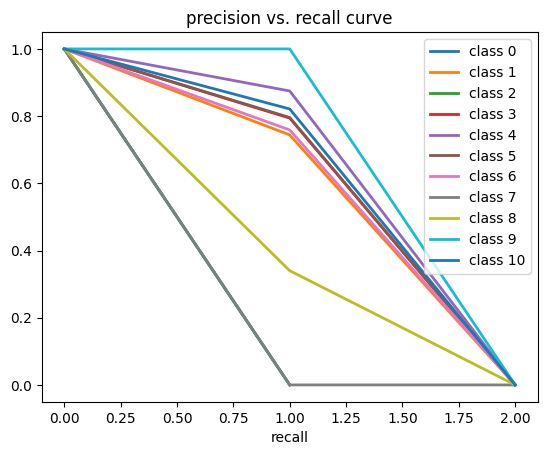

Accuracy is: >0.802
Accuracy: 0.833 (0.046)


In [40]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
import tensorflow as tf
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,matthews_corrcoef

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(500, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dropout(0.2)) 
	model.add(Dense(300, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
	return model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	#X=np.array(X)
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	skf = StratifiedKFold(n_splits=10)
	# enumerate folds
	for train_ix, test_ix in skf.split(X,np.zeros(shape=(X.shape[0], 1))):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
        #X_test.to_csv('out.csv', index=False)  
		#print(y_test)
		model = get_model(n_inputs, n_outputs)
		# fit model
		history=model.fit(X_train, y_train,validation_split=0.2, verbose=0, epochs=200, batch_size=16)
		#model.save("protein_model.h5")
		plt.plot(history.history['accuracy'])
		plt.plot(history.history['val_accuracy'])
		plt.title('model accuracy')
		plt.ylabel('accuracy')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='lower right')
		plt.show()
		# summarize history for loss
		plt.plot(history.history['loss'])
		plt.plot(history.history['val_loss'])
		plt.title('model loss')
		plt.ylabel('loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='upper left')
		plt.show()
		yhat = model.predict(X_test)
		mcc = matthews_corrcoef(np.argmax(y_test,axis=1), np.argmax(yhat,axis=1))
		print('MCC-Score',mcc)
		# round probabilities to class labels
		yhat = yhat.round()
		#print(yhat)
		#print(multilabel_confusion_matrix(y_test, yhat))
		acc = accuracy_score(y_test, yhat)
		print(classification_report(y_test, yhat))
		# precision recall curve
		precision = dict()
		recall = dict()
		for i in range(11):
			precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        yhat[:, i])
			plt.plot(recall[i], lw=2, label='class {}'.format(i))    
		plt.xlabel("recall")
		#plt.ylabel("precision")
		plt.legend(loc="best")
		plt.title("precision vs. recall curve")
		plt.show()                                                                                  
		# store result
		print('Accuracy is: >%.3f' % acc)
		results.append(acc)
	return results
                      
# load dataset

# evaluate model
results = evaluate_model(X, encoded_metal.toarray().astype(np.uint8))
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))